In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

columnsn = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash','Magnesium', 
           'Total phenois', 'Flavanoids', 'Nonflavanoid phenois', 'Proanthocyanins', 'Color intensity', 'hue', 'OD280/OD315 of diluted wines', 'Proline']
fileurl = ('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')
df = pd.read_csv(fileurl, delimiter=',', names = columnsn)
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenois                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenois          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

Class label                     0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenois                   0
Flavanoids                      0
Nonflavanoid phenois            0
Proanthocyanins                 0
Color intensity                 0
hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [10]:
df['Class label'].value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

Objetivos = clases 1,2,3

In [25]:
#x y y
X = df.drop(columns = 'Class label')
y = df['Class label']
# Entrenamos test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

# Regresion logistica comparacion individual

In [26]:
# estandarizacion de data
scaler = StandardScaler()
# encajamos en el modelo de entrenamiento
scaler.fit(X_train)
#Aplicamos transformacion para ambos modelos
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:

#comparacion individual
from sklearn.multiclass import OneVsOneClassifier

log_reg = LogisticRegression()
o_v_1 = OneVsOneClassifier(log_reg)
o_v_1.fit(X_train, y_train)

print('El modelo de entrenamiento tiene una aproximación de ', o_v_1.score(X_train,y_train))
print('El modelo de prueba tiene una aproximación de ', o_v_1.score(X_test,y_test))

El modelo de entrenamiento tiene una aproximación de  1.0
El modelo de prueba tiene una aproximación de  1.0


# Regresion logistica comparacion colectiva

In [14]:
log_reg = LogisticRegression(multi_class='ovr')
log_reg.fit(X_train, y_train)

print('El modelo de entrenamiento tiene una aproximación de ', log_reg.score(X_train,y_train))
print('El modelo de prueba tiene una aproximación de ', log_reg.score(X_test,y_test))

El modelo de entrenamiento tiene una aproximación de  1.0
El modelo de prueba tiene una aproximación de  1.0


# Reg Logistica - regularizacion l1

In [15]:
log_reg = LogisticRegression(penalty='l1', solver='liblinear')
log_reg.fit(X_train, y_train)

print('El modelo de entrenamiento tiene una aproximación de ', log_reg.score(X_train,y_train))
print('El modelo de prueba tiene una aproximación de ', log_reg.score(X_test,y_test))

El modelo de entrenamiento tiene una aproximación de  1.0
El modelo de prueba tiene una aproximación de  1.0


# Reg logistica - regularizacion l2

In [17]:
log_reg = LogisticRegression(penalty='l2')
log_reg.fit(X_train, y_train)

print('El modelo de entrenamiento tiene una aproximación de ', log_reg.score(X_train,y_train))
print('El modelo de prueba tiene una aproximación de ', log_reg.score(X_test,y_test))

El modelo de entrenamiento tiene una aproximación de  1.0
El modelo de prueba tiene una aproximación de  1.0


# KNN

In [16]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print('El modelo de entrenamiento tiene una aproximación de ', knn.score(X_train,y_train))
print('El modelo de prueba tiene una aproximación de ', knn.score(X_test,y_test))

El modelo de entrenamiento tiene una aproximación de  0.967741935483871
El modelo de prueba tiene una aproximación de  0.9629629629629629


# Arbol anidado

In [19]:
bt = BaggingClassifier()
bt.fit(X_train, y_train)

print('El modelo de entrenamiento tiene una aproximación de ', bt.score(X_train,y_train))
print('El modelo de prueba tiene una aproximación de ', bt.score(X_test,y_test))

El modelo de entrenamiento tiene una aproximación de  1.0
El modelo de prueba tiene una aproximación de  0.9814814814814815


# Arbol aleatorio

In [27]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print('El modelo de entrenamiento tiene una aproximación de ', rf.score(X_train,y_train))
print('El modelo de prueba tiene una aproximación de ', rf.score(X_test,y_test))

El modelo de entrenamiento tiene una aproximación de  1.0
El modelo de prueba tiene una aproximación de  1.0


1. ¿Qué modelo funcionó mejor?
2. ¿Cuáles son las características más importantes de tus modelos? ¿Hay algún modelo que te haya gustado más y por qué?

In [ ]:
# 1 : Regresión logística en todos sus casos, y árbol aleatorio

Text(0.5, 1.0, 'Evaluacion de caracteristicas')

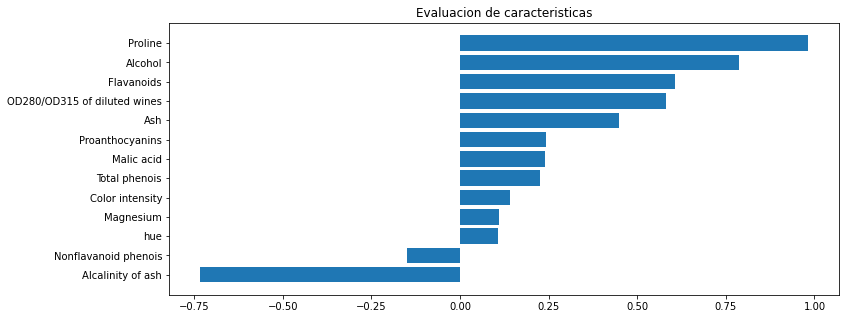

In [29]:
# 2 : Para evaluar características
caract_df = pd.DataFrame(zip(X.columns, log_reg.coef_[0]), columns = ['Caracteristica', 'Coeficiente'])
caract_df.sort_values(by='Coeficiente', inplace = True)

plt.figure(figsize = (12, 5))
plt.barh(caract_df['Caracteristica'], caract_df['Coeficiente'])
plt.title('Evaluacion de caracteristicas')